# 第5回課題
第5回課題では，以下の項目を満たすように分析してください．

明確な解答は用意していませんが，少なくとも間違っていないと言える推論をするようにしてください．

- データの取得
- データの確認
 - 特徴量の確認
 - ラベルの確認
- 仮説を立てる
- データの分析
- モデルの訓練
- 予測
- 精度の確認
- 仮説の確認

# データの取得
wine data 以外を利用してデータ分析してください．

なるべく，ラベルと属性から推論が立てやすいデータを選択するとやりやすいです．

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
bike_df = pd.read_csv("train.csv")

# データの確認
データ分析以前にわかることを確認．特徴量の属性やドメイン知識など
- 特徴量の確認
- ラベルの確認

In [2]:
#特徴量
# 1.id 2.dteday(日付) 3.season 4.yr(年) 5.mnth(月) 6.hr(時間)　7.holiday(祝日) 8.weekday(曜日) 9.workinghday(平日)
# 10.weathersit(天気 1:晴,やや曇 2:薄い霧+曇,霧+千切れ雲,霧+やや曇り,薄い霧, 3:小雪,小雨+雷雨+千切れ曇,小雨+千切れ曇, 4:大雨+凍雨+雷雨+霧,雪+濃い霧)
# 11.temp(温度) 12.atemp(体感温度) 13.hum(湿度) 14.windspeed(風速) 15.cnt(利用者数)

In [3]:
bike_df

,id,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,8641,2011-12-31,1,0,12,19,0,6,0,1,0.42,0.4242,0.54,0.2239,92
8641,8642,2011-12-31,1,0,12,20,0,6,0,1,0.42,0.4242,0.54,0.2239,71
8642,8643,2011-12-31,1,0,12,21,0,6,0,1,0.40,0.4091,0.58,0.1940,52
8643,8644,2011-12-31,1,0,12,22,0,6,0,1,0.38,0.3939,0.62,0.1343,38


In [4]:
print("keys:",bike_df.keys())

print("\ntype:\n",bike_df.dtypes)

keys: Index(['id', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

type:
 id              int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object


In [5]:
#f=list(bike_df.keys())

In [6]:
#回帰に有用でないものを取り除く
drop_col = ["dteday","season","id","yr","mnth","hr","holiday","weekday","workingday","weathersit"]
drop_cols=["cnt"]
bike_df = bike_df.drop(drop_col,axis=1)
bike_df_a = bike_df.drop(drop_cols,axis=1)

print(bike_df)
print(bike_df_a)

      temp   atemp   hum  windspeed  cnt
0     0.24  0.2879  0.81     0.0000   16
1     0.22  0.2727  0.80     0.0000   40
2     0.22  0.2727  0.80     0.0000   32
3     0.24  0.2879  0.75     0.0000   13
4     0.24  0.2879  0.75     0.0000    1
...    ...     ...   ...        ...  ...
8640  0.42  0.4242  0.54     0.2239   92
8641  0.42  0.4242  0.54     0.2239   71
8642  0.40  0.4091  0.58     0.1940   52
8643  0.38  0.3939  0.62     0.1343   38
8644  0.36  0.3788  0.66     0.0000   31

[8645 rows x 5 columns]
      temp   atemp   hum  windspeed
0     0.24  0.2879  0.81     0.0000
1     0.22  0.2727  0.80     0.0000
2     0.22  0.2727  0.80     0.0000
3     0.24  0.2879  0.75     0.0000
4     0.24  0.2879  0.75     0.0000
...    ...     ...   ...        ...
8640  0.42  0.4242  0.54     0.2239
8641  0.42  0.4242  0.54     0.2239
8642  0.40  0.4091  0.58     0.1940
8643  0.38  0.3939  0.62     0.1343
8644  0.36  0.3788  0.66     0.0000

[8645 rows x 4 columns]


# 仮説を立てる
データについて，導きたい仮説と結論を整理してください．




もともとは、様々なデータからレンタル自転車の利用者数を予測するという設定

レンタル自転車の利用者数にはtemp(温度),atemp(体感温度)の値が大きく影響していると予想

一方で,hum(湿度)に関してはレンタル自転車の利用者数の予測に大きな影響を持たないと予想する

また、temp(温度)とatemp(体感温度)それぞれのcnt(利用者数)への影響に関しては，temp(温度)のほうが強くcnt(利用者数)に影響していると予想


# データの分析

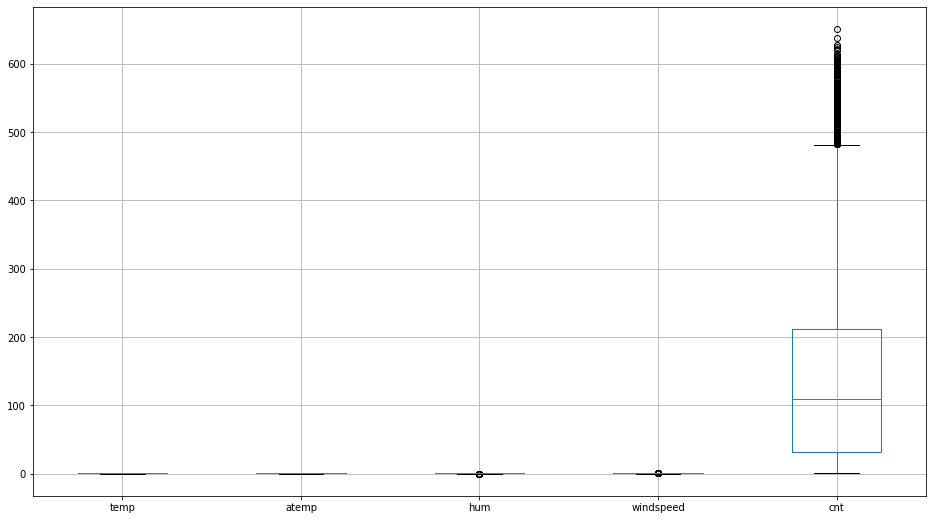

In [7]:
#箱ひげ図
bike_df.boxplot(figsize=(16,9))

In [8]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [9]:
f=list(bike_df.keys())

In [10]:
bike_df=pd.DataFrame(min_max_scaler.fit_transform(bike_df),columns=(f))
bike_df

,temp,atemp,hum,windspeed,cnt
0,0.234043,0.2879,0.81,0.000000,0.023077
1,0.212766,0.2727,0.80,0.000000,0.060000
2,0.212766,0.2727,0.80,0.000000,0.047692
3,0.234043,0.2879,0.75,0.000000,0.018462
4,0.234043,0.2879,0.75,0.000000,0.000000
...,...,...,...,...,...
8640,0.425532,0.4242,0.54,0.263195,0.140000
8641,0.425532,0.4242,0.54,0.263195,0.107692
8642,0.404255,0.4091,0.58,0.228047,0.078462
8643,0.382979,0.3939,0.62,0.157870,0.056923


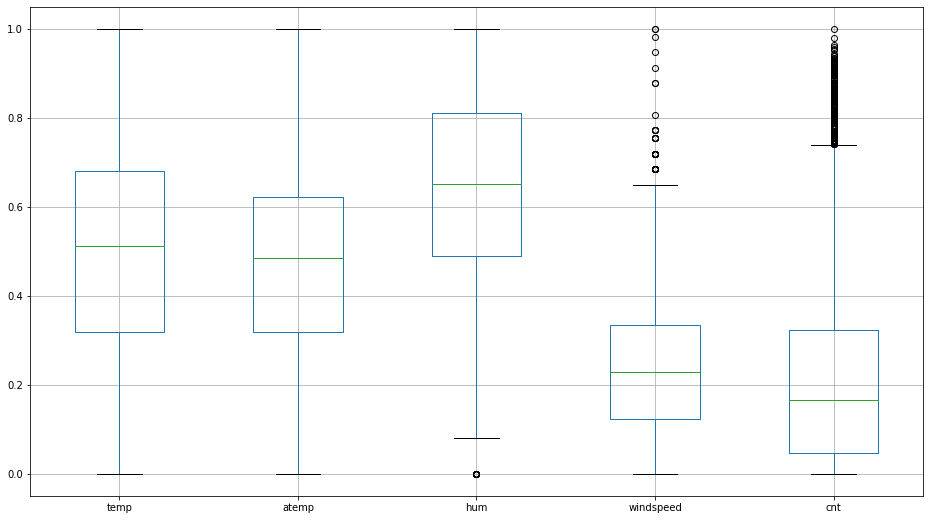

In [11]:
bike_df.boxplot(figsize=(16,9))

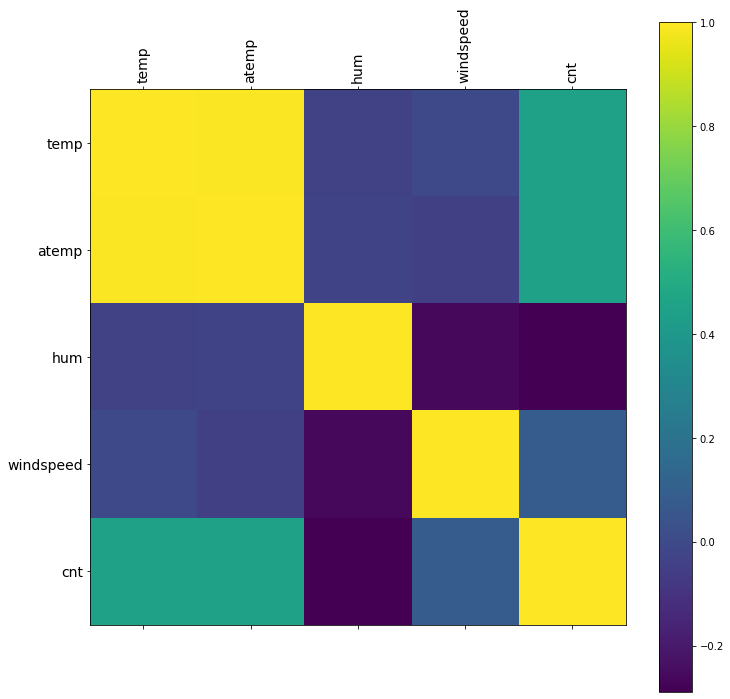

In [12]:
#相関図
fig = plt.figure(figsize=(12, 12))
plt.matshow(bike_df.corr("pearson"), fignum=fig.number)
plt.xticks(range(bike_df.shape[1]), bike_df.columns, fontsize=14, rotation=90)
plt.yticks(range(bike_df.shape[1]), bike_df.columns, fontsize=14)
plt.colorbar()

#temp(温度),atemp(体感温度)がcnt(利用者数)に影響してそう

In [28]:
#corr = bike_df.corr().values
#[[bike_df.columns[i], bike_df.columns[j], corr[i][j]] for i in range(bike_df.shape[1]-1) for j in range(bike_df.shape[1]-1)if abs(corr[i][j]) < 1.0 and corr[i][j] != 1]

Text(0, 0.5, 'cnt')

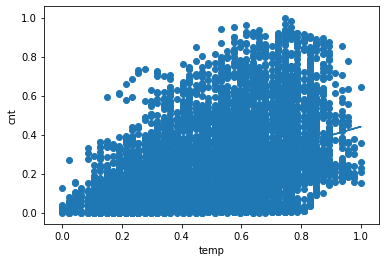

In [14]:
from sklearn import linear_model

clf = linear_model.LinearRegression()
X = bike_df["temp"].values.reshape(-1, 1)
Y = bike_df["cnt"]
clf.fit(X, Y)

# 傾き，切片，相関係数の2乗
clf.coef_, clf.intercept_, clf.score(X, Y) 

plt.plot(X, clf.coef_ * X + clf.intercept_)
plt.scatter(X, Y)
plt.xlabel("temp")
plt.ylabel("cnt")

Text(0, 0.5, 'cnt')

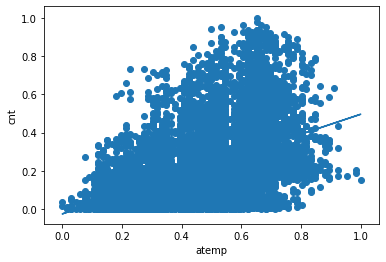

In [15]:
clf = linear_model.LinearRegression()
X = bike_df["atemp"].values.reshape(-1, 1)
Y = bike_df["cnt"]
clf.fit(X, Y)

# 傾き，切片，相関係数の2乗
clf.coef_, clf.intercept_, clf.score(X, Y) 

plt.plot(X, clf.coef_ * X + clf.intercept_)
plt.scatter(X, Y)
plt.xlabel("atemp")
plt.ylabel("cnt")

Text(0, 0.5, 'cnt')

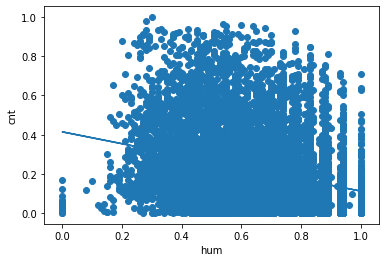

In [16]:
clf = linear_model.LinearRegression()
X = bike_df["hum"].values.reshape(-1, 1)
Y = bike_df["cnt"]
clf.fit(X, Y)

# 傾き，切片，相関係数の2乗
clf.coef_, clf.intercept_, clf.score(X, Y) 

plt.plot(X, clf.coef_ * X + clf.intercept_)
plt.scatter(X, Y)
plt.xlabel("hum")
plt.ylabel("cnt")

In [17]:
#データの分割

from sklearn.model_selection import train_test_split
X_train, X_test= train_test_split(bike_df_a,test_size=0.33,random_state=1)
y_train, y_test= train_test_split(bike_df[["cnt"]],test_size=0.33,random_state=1)

X_train.shape, X_test.shape,y_train.shape,y_test.shape

((5792, 4), (2853, 4), (5792, 1), (2853, 1))

# モデルの訓練
データは分割するようにしてください．交叉検証についてはまだ説明したいので自由にしてください．

また，モデルの訓練およびデータ分割時に乱数の指定がないなど再現性がなさそうなコードは認めないことにします．

モデルは自由ですが，sklearn を想定しています．自作ライブラリも可ですが，自作の場合，該当箇所は適当に読みます．

In [18]:
from sklearn.svm import SVR
X_train.shape, X_test.shape,y_train.shape,y_test.shape
# 訓練
clf = SVR()
clf.fit(X_train, y_train)

C:\Users\pikka\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# 予測

In [19]:
# 予測
pred = clf.predict(X_test)
pred

array([0.14131137, 0.21280531, 0.33394941, ..., 0.17680832, 0.33736141,
       0.13125328])

# 精度の確認

In [20]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import sklearn
# 評価
#平均二乗誤差と平均絶対誤差,決定係数を算出

print("平均二乗誤差",mean_squared_error(pred,y_test))
print("平均絶対誤差",mean_absolute_error(pred,y_test))
print("決定係数:",sklearn.metrics.r2_score(y_test, pred))

平均二乗誤差 0.03064386136112565
平均絶対誤差 0.13109510767009802
決定係数: 0.3013135119195788


平均二乗誤差 0.03243256110343326
平均絶対誤差 0.13790737505822234
決定係数: 0.26053078136041175


[Text(446.4, 428.08500000000004, 'atemp <= 0.614\nmse = 0.042\nsamples = 5792\nvalue = 0.218'),
 Text(223.2, 305.775, 'temp <= 0.35\nmse = 0.029\nsamples = 4271\nvalue = 0.168'),
 Text(111.6, 183.46500000000003, 'temp <= 0.27\nmse = 0.013\nsamples = 1713\nvalue = 0.108'),
 Text(55.8, 61.15499999999997, 'mse = 0.009\nsamples = 1005\nvalue = 0.085'),
 Text(167.39999999999998, 61.15499999999997, 'mse = 0.017\nsamples = 708\nvalue = 0.141'),
 Text(334.79999999999995, 183.46500000000003, 'hum <= 0.705\nmse = 0.036\nsamples = 2558\nvalue = 0.209'),
 Text(279.0, 61.15499999999997, 'mse = 0.037\nsamples = 1055\nvalue = 0.274'),
 Text(390.59999999999997, 61.15499999999997, 'mse = 0.029\nsamples = 1503\nvalue = 0.163'),
 Text(669.5999999999999, 305.775, 'hum <= 0.625\nmse = 0.05\nsamples = 1521\nvalue = 0.359'),
 Text(558.0, 183.46500000000003, 'hum <= 0.555\nmse = 0.048\nsamples = 1010\nvalue = 0.406'),
 Text(502.2, 61.15499999999997, 'mse = 0.049\nsamples = 749\nvalue = 0.422'),
 Text(613.8, 6

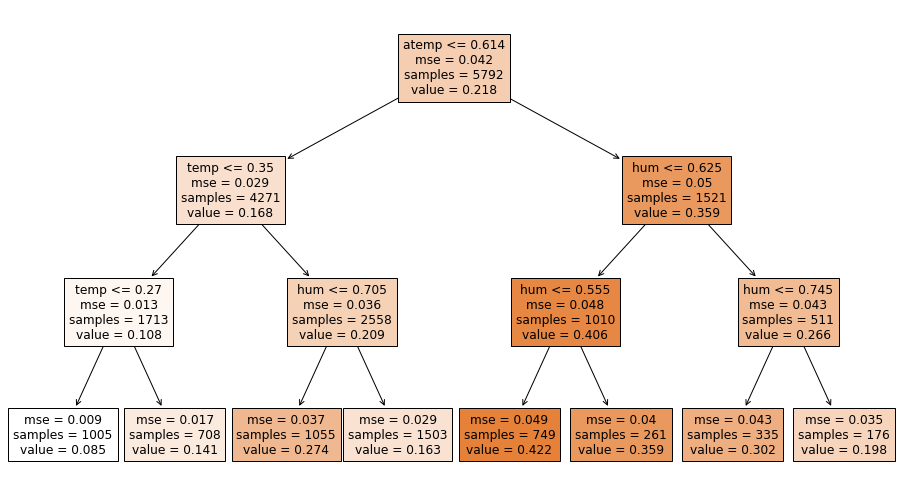

In [21]:
from sklearn import tree
from sklearn.metrics import accuracy_score
import sklearn

#訓練
clf = tree.DecisionTreeRegressor(max_depth=3)
clf.fit(X_train, y_train)

#予測
pred = clf.predict(X_test)

# 評価
print("平均二乗誤差",mean_squared_error(pred,y_test))
print("平均絶対誤差",mean_absolute_error(pred,y_test))
print("決定係数:",sklearn.metrics.r2_score(y_test, pred))

# 可視化
plt.figure(figsize=(16, 9))
tree.plot_tree(clf, feature_names=f, class_names=["0", "1", "2"],filled=True, max_depth=3) 

C:\Users\pikka\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
予測 [0.14133374 0.21508431 0.33201687 ... 0.17300871 0.35248707 0.12977951]
平均二乗誤差: 0.030717725626471504
平均絶対誤差: 0.13114551005419064
決定係数: 0.26053078136041175


[Text(446.4, 428.08500000000004, 'temp <= 0.479\nmse = 0.042\nsamples = 5792\nvalue = 0.218'),
 Text(223.2, 305.775, 'temp <= 0.266\nmse = 0.02\nsamples = 2779\nvalue = 0.137'),
 Text(111.6, 183.46500000000003, 'hum <= 0.415\nmse = 0.009\nsamples = 1005\nvalue = 0.085'),
 Text(55.8, 61.15499999999997, 'mse = 0.007\nsamples = 172\nvalue = 0.117'),
 Text(167.39999999999998, 61.15499999999997, 'mse = 0.009\nsamples = 833\nvalue = 0.078'),
 Text(334.79999999999995, 183.46500000000003, 'hum <= 0.635\nmse = 0.024\nsamples = 1774\nvalue = 0.167'),
 Text(279.0, 61.15499999999997, 'mse = 0.023\nsamples = 831\nvalue = 0.215'),
 Text(390.59999999999997, 61.15499999999997, 'mse = 0.02\nsamples = 943\nvalue = 0.126'),
 Text(669.5999999999999, 305.775, 'hum <= 0.685\nmse = 0.05\nsamples = 3013\nvalue = 0.293'),
 Text(558.0, 183.46500000000003, 'hum <= 0.555\nmse = 0.048\nsamples = 1613\nvalue = 0.371'),
 Text(502.2, 61.15499999999997, 'mse = 0.048\nsamples = 1001\nvalue = 0.401'),
 Text(613.8, 61.15

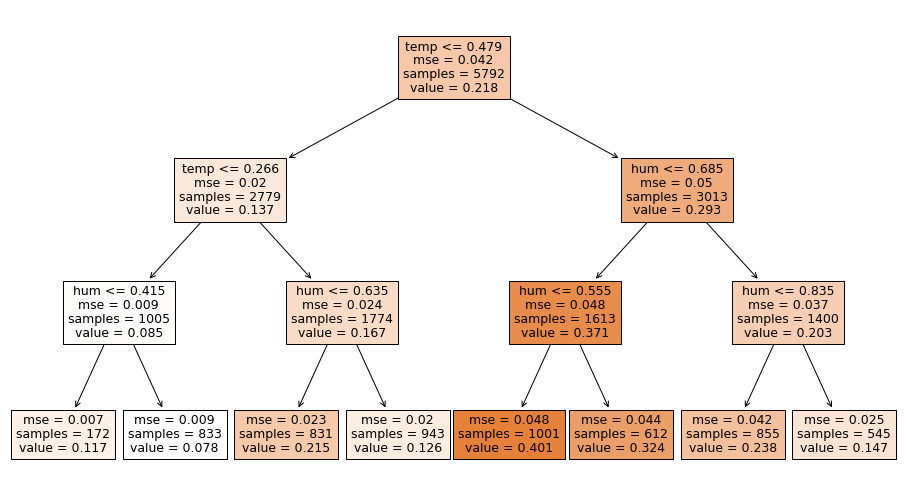

In [23]:
#bike_dfから"atemp"(体感温度)を除いたもので予測

new_bike_df=bike_df.drop(["atemp"],axis=1)
drop_col=["cnt","atemp"]
new_bike_df_a=bike_df.drop(drop_col,axis=1)

#print(new_bike_df)
#print(new_bike_df_a)

X_train1, X_test1= train_test_split(new_bike_df_a,test_size=0.33,random_state=1)
y_train1, y_test1= train_test_split(new_bike_df[["cnt"]],test_size=0.33,random_state=1)

# 訓練
clf = SVR()
print(clf.fit(X_train1, y_train1))

# 予測
pred1 = clf.predict(X_test1)
print("予測",pred1)

# 評価
#平均二乗誤差と平均絶対誤差,決定係数を算出

print("平均二乗誤差:",mean_squared_error(pred1,y_test1))
print("平均絶対誤差:",mean_absolute_error(pred1,y_test1))
print("決定係数:",sklearn.metrics.r2_score(y_test1, pred))

new_f=list(new_bike_df.keys())
new_f

#訓練
clf = tree.DecisionTreeRegressor(max_depth=3)
clf.fit(X_train1, y_train1)

#予測
pred = clf.predict(X_test1)

# 可視化
plt.figure(figsize=(16, 9))
tree.plot_tree(clf, feature_names=new_f, class_names=["0", "1", "2"],filled=True, max_depth=3) 

C:\Users\pikka\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
予測 [0.13714284 0.23737746 0.32843629 ... 0.17650554 0.35919393 0.13099132]
平均二乗誤差: 0.03081090392129126
平均絶対誤差: 0.13129128609499696
決定係数: 0.2975049063934446


[Text(446.4, 428.08500000000004, 'atemp <= 0.614\nmse = 0.042\nsamples = 5792\nvalue = 0.218'),
 Text(223.2, 305.775, 'atemp <= 0.371\nmse = 0.029\nsamples = 4271\nvalue = 0.168'),
 Text(111.6, 183.46500000000003, 'atemp <= 0.28\nmse = 0.014\nsamples = 1885\nvalue = 0.114'),
 Text(55.8, 61.15499999999997, 'mse = 0.009\nsamples = 1045\nvalue = 0.088'),
 Text(167.39999999999998, 61.15499999999997, 'mse = 0.019\nsamples = 840\nvalue = 0.147'),
 Text(334.79999999999995, 183.46500000000003, 'hum <= 0.705\nmse = 0.036\nsamples = 2386\nvalue = 0.211'),
 Text(279.0, 61.15499999999997, 'mse = 0.038\nsamples = 956\nvalue = 0.28'),
 Text(390.59999999999997, 61.15499999999997, 'mse = 0.03\nsamples = 1430\nvalue = 0.165'),
 Text(669.5999999999999, 305.775, 'hum <= 0.625\nmse = 0.05\nsamples = 1521\nvalue = 0.359'),
 Text(558.0, 183.46500000000003, 'hum <= 0.555\nmse = 0.048\nsamples = 1010\nvalue = 0.406'),
 Text(502.2, 61.15499999999997, 'mse = 0.049\nsamples = 749\nvalue = 0.422'),
 Text(613.8, 6

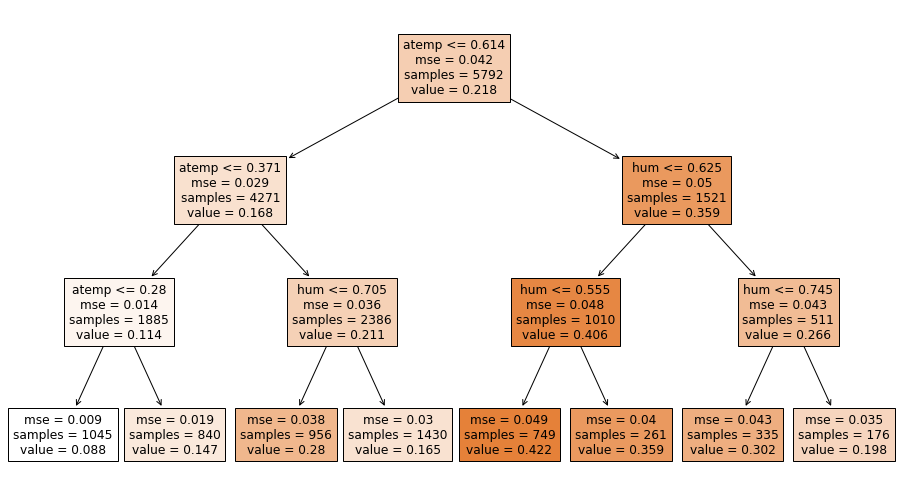

In [24]:
#bike_dfから"temp"(温度)を除いたもので予測

new_new_bike_df=bike_df.drop(["temp"],axis=1)
drop_col=["cnt","temp"]
new_new_bike_df_a=bike_df.drop(drop_col,axis=1)

X_train2, X_test2= train_test_split(new_new_bike_df_a,test_size=0.33,random_state=1)
y_train2, y_test2= train_test_split(new_new_bike_df[["cnt"]],test_size=0.33,random_state=1)

# 訓練
clf = SVR()
print(clf.fit(X_train2, y_train2))

# 予測
pred2 = clf.predict(X_test2)
print("予測",pred2)

# 評価
#平均二乗誤差と平均絶対誤差,決定係数を算出
print("平均二乗誤差:",mean_squared_error(pred2,y_test2))
print("平均絶対誤差:",mean_absolute_error(pred2,y_test2))
print("決定係数:",sklearn.metrics.r2_score(y_test2, pred2))

new_new_f=list(new_new_bike_df.keys())
#print(new_new_f)

#訓練
clf = tree.DecisionTreeRegressor(max_depth=3)
clf.fit(X_train2, y_train2)

#予測
pred2 = clf.predict(X_test2)

# 可視化
plt.figure(figsize=(16, 9))
tree.plot_tree(clf, feature_names=new_new_f, class_names=["0", "1", "2"],filled=True, max_depth=3) 

C:\Users\pikka\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
予測 [0.21277661 0.3483099  0.28143444 ... 0.1124787  0.20431276 0.20971002]
平均二乗誤差: 0.034127279891140595
平均絶対誤差: 0.13857591766333122
決定係数: 0.2218908363445643


[Text(446.4, 428.08500000000004, 'atemp <= 0.614\nmse = 0.042\nsamples = 5792\nvalue = 0.218'),
 Text(223.2, 305.775, 'temp <= 0.351\nmse = 0.029\nsamples = 4271\nvalue = 0.168'),
 Text(111.6, 183.46500000000003, 'temp <= 0.266\nmse = 0.013\nsamples = 1713\nvalue = 0.108'),
 Text(55.8, 61.15499999999997, 'mse = 0.009\nsamples = 1005\nvalue = 0.085'),
 Text(167.39999999999998, 61.15499999999997, 'mse = 0.017\nsamples = 708\nvalue = 0.141'),
 Text(334.79999999999995, 183.46500000000003, 'temp <= 0.457\nmse = 0.036\nsamples = 2558\nvalue = 0.209'),
 Text(279.0, 61.15499999999997, 'mse = 0.026\nsamples = 855\nvalue = 0.18'),
 Text(390.59999999999997, 61.15499999999997, 'mse = 0.04\nsamples = 1703\nvalue = 0.223'),
 Text(669.5999999999999, 305.775, 'windspeed <= 0.211\nmse = 0.05\nsamples = 1521\nvalue = 0.359'),
 Text(558.0, 183.46500000000003, 'temp <= 0.734\nmse = 0.05\nsamples = 691\nvalue = 0.319'),
 Text(502.2, 61.15499999999997, 'mse = 0.055\nsamples = 308\nvalue = 0.286'),
 Text(613

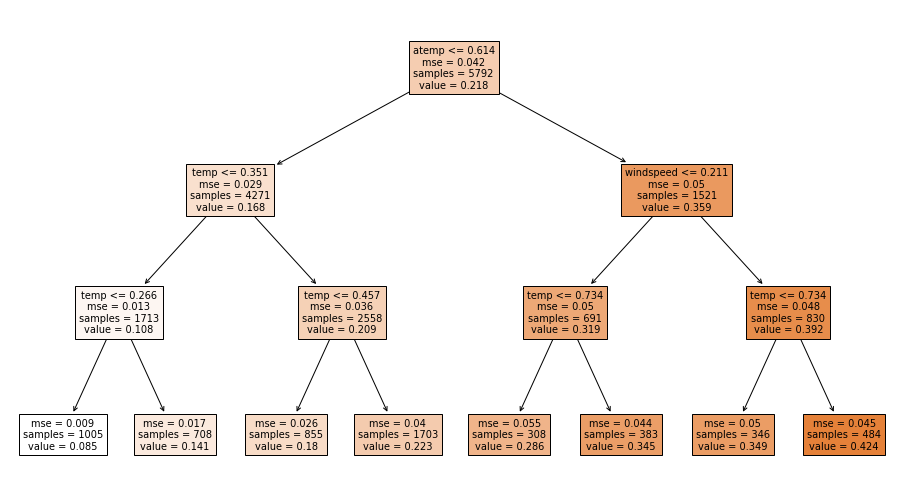

In [25]:
#bike_dfから"hum"(湿度)を除いたもので予測

new_new_new_bike_df=bike_df.drop(["hum"],axis=1)
drop_col=["cnt","hum"]
new_new_new_bike_df_a=bike_df.drop(drop_col,axis=1)

X_train3, X_test3= train_test_split(new_new_new_bike_df_a,test_size=0.33,random_state=1)
y_train3, y_test3= train_test_split(new_new_new_bike_df[["cnt"]],test_size=0.33,random_state=1)

# 訓練
clf = SVR()
print(clf.fit(X_train3, y_train3))

# 予測
pred3 = clf.predict(X_test3)
print("予測",pred3)

# 評価
#平均二乗誤差と平均絶対誤差,決定係数を算出

print("平均二乗誤差:",mean_squared_error(pred3,y_test3))
print("平均絶対誤差:",mean_absolute_error(pred3,y_test3))
print("決定係数:",sklearn.metrics.r2_score(y_test3, pred3))

new_new_new_f=list(new_new_new_bike_df.keys())
#print(new_new_f)

#訓練
clf = tree.DecisionTreeRegressor(max_depth=3)
clf.fit(X_train3, y_train3)

#予測
pred3 = clf.predict(X_test3)

# 可視化
plt.figure(figsize=(16, 9))
tree.plot_tree(clf, feature_names=new_new_new_f, class_names=["0", "1", "2"],filled=True, max_depth=3) 

# 仮説の確認
最初に立てた仮説を確認してください．

予測傾向など精度ベースでも仮説を確認することはできますが，決定木や可視化を用いる方が楽かもしれません．


temp(温度), atemp(体感温度), hum(湿度)が特徴量として含まれているときの回帰木よりこれらの3つの特徴量はすべてcnt(利用者数)の予測に有効であることが分かった．

hum(湿度)を除いた時，平均二乗誤差と平均絶対誤差の値が最も大きくなり決定係数の値が最も大きくなった.
このことから，cnt(利用者数)の値の予測にhum(湿度)の値が有効であることが分かった．


atemp(体感温度), temp(温度)をそれぞれ除いた時の各予測値の値より，temp(温度)の方がatemp(体感温度)よりもcnt(利用者数)の予測に有効であることが分かった．（これに関しては仮説通り）

windspeed(風速)に関してはcnt(利用者数)の予測には影響がないこともわかった．（これに関しては，大きな影響はないと思っていたが全く影響がないのは想定外であった）


weathersit(天気)やholiday(祝日)，workinghday(平日)をcnt(利用者数)の予測に用いることで，さらに精度を上げることができるかもしれない．
